# 🧩 Notebook 01: Descriptive Statistics and Initial EDA with Statsmodels

In [1]:
# Setup and Imports

import pandas as pd
from pathlib import Path
import sys

# ✅ Setup path to use utils
PROJECT_ROOT = Path.cwd().parent
if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))

# Now you can import like this:
from utils.visual_utils import (
    plot_histograms,
    plot_boxplots,
    plot_pairplot,
    plot_correlation_heatmap,
    save_and_show_plot
)
from utils.model_utils import summarize_stats, compute_central_tendency
from utils.diagnostics import compute_skewness_kurtosis

# Constants
DATA_PATH = Path("../synthetic_data")
EXPORT_PLOTS = Path("../exports/plots/01_intro_descriptive")
EXPORT_TABLES = Path("../exports/tables/01_intro_descriptive")

EXPORT_PLOTS.mkdir(parents=True, exist_ok=True)
EXPORT_TABLES.mkdir(parents=True, exist_ok=True)

In [2]:
# Load the synthetic OLS dataset
df = pd.read_csv(DATA_PATH / "ols_data.csv")

# Quick look
df.head()

,X1,X2,y
0,5.993428,11.073362,0.847148
1,4.723471,11.682354,0.008497
2,6.295377,13.249154,2.176524
3,8.046060,13.161406,4.926576
4,4.531693,5.866992,4.015547


In [3]:
# Full summary
summary_df = summarize_stats(df)
display(summary_df)

# Export summary table
summary_df.to_csv(EXPORT_TABLES / "summary_stats.csv")

,count,mean,std,min,25%,50%,75%,max
X1,200.0,4.918458,1.862008,-0.239490,3.589745,4.991616,6.001705,10.440338
X2,200.0,10.257605,2.961011,0.276198,8.182487,10.236518,12.061693,21.558194
y,200.0,2.068881,3.507506,-5.840717,-0.522234,2.072536,4.506071,14.073565


In [4]:
# Central Tendency (Mean, Median, Mode)
central_df = compute_central_tendency(df, cols=['X1', 'X2', 'y'])
display(central_df)

# Export table
central_df.to_csv(EXPORT_TABLES / "central_tendency.csv")

,mean,median,mode
X1,4.918458,4.991616,-0.239490
X2,10.257605,10.236518,0.276198
y,2.068881,2.072536,-5.840717


In [5]:
# Skewness and Kurtosis
shape_dict = compute_skewness_kurtosis(df, cols=['X1', 'X2', 'y'])
shape_df = pd.DataFrame(shape_dict).T
display(shape_df)

# Export
shape_df.to_csv(EXPORT_TABLES / "skew_kurtosis.csv")

,skewness,kurtosis
X1,0.133476,3.028806
X2,0.173763,3.821817
y,0.164661,3.006351


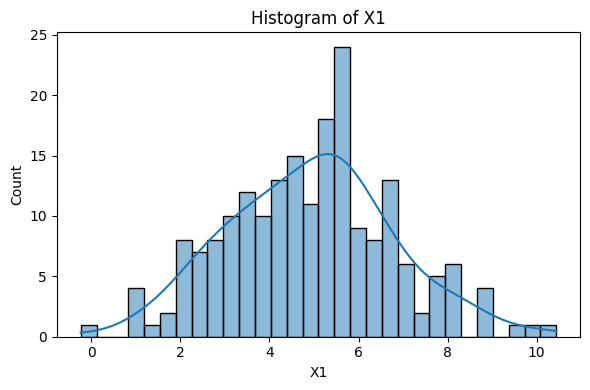

<Figure size 640x480 with 0 Axes>

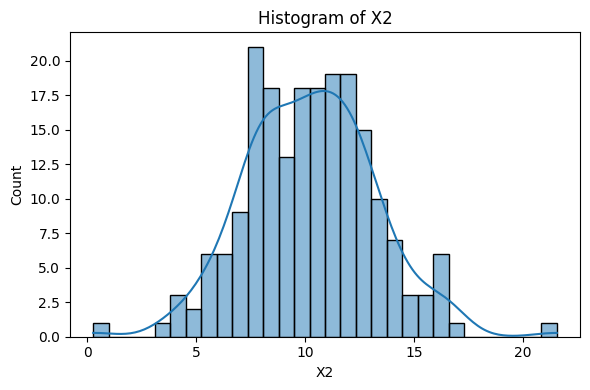

<Figure size 640x480 with 0 Axes>

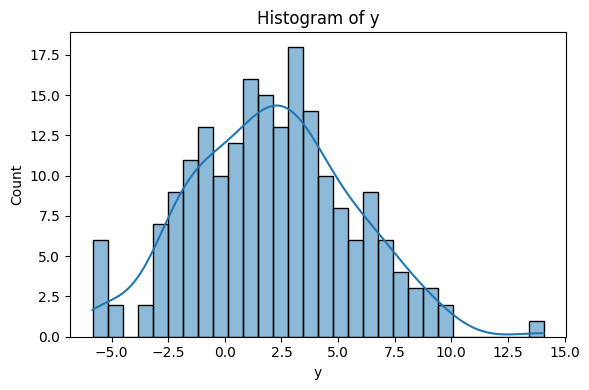

<Figure size 640x480 with 0 Axes>

In [6]:
# Histograms
for col in ['X1', 'X2', 'y']:
    plot_histograms(df, cols=[col], bins=30)
    save_and_show_plot(f"hist_{col}", EXPORT_PLOTS);

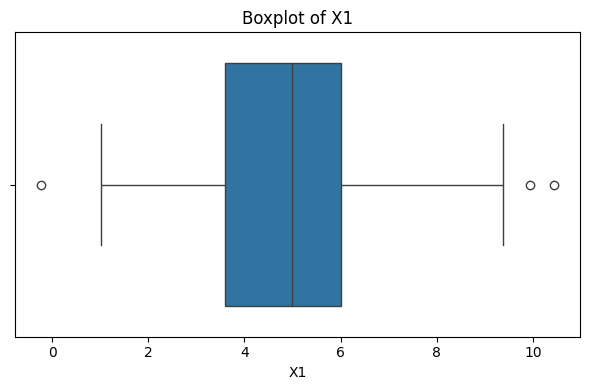

<Figure size 640x480 with 0 Axes>

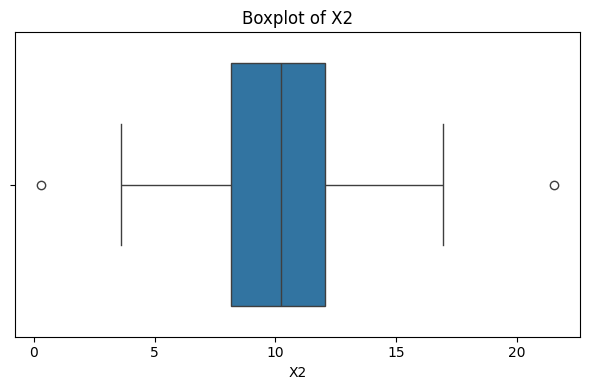

<Figure size 640x480 with 0 Axes>

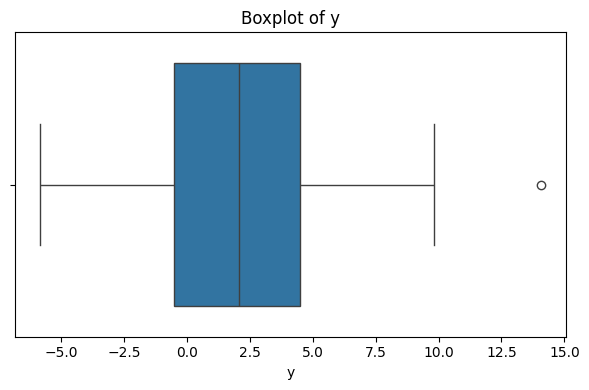

<Figure size 640x480 with 0 Axes>

In [7]:
# Boxplots
for col in ['X1', 'X2', 'y']:
    plot_boxplots(df, cols=[col])
    save_and_show_plot(f"box_{col}", EXPORT_PLOTS);

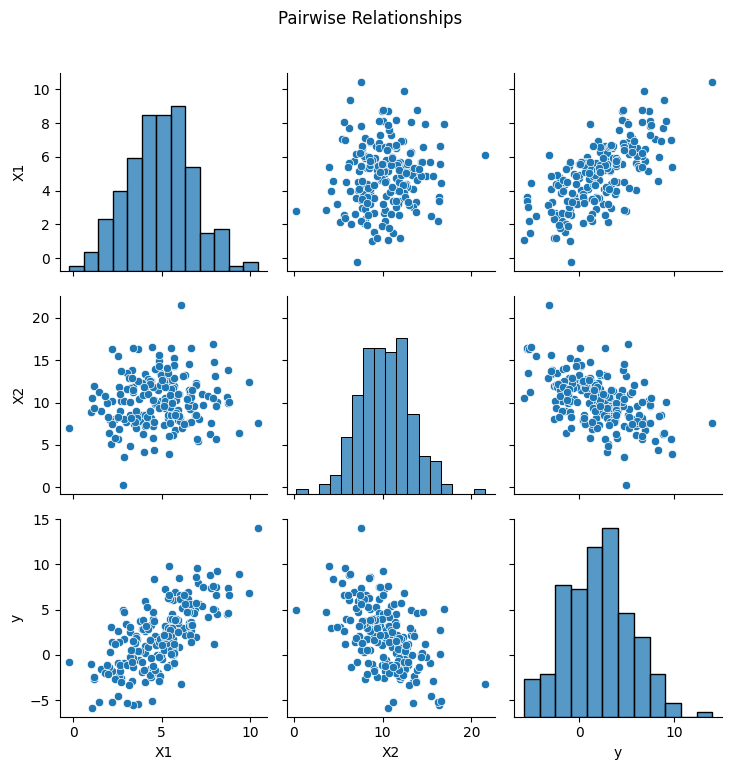

<Figure size 640x480 with 0 Axes>

In [8]:
# Pairplot (all variables)
plot_pairplot(df)
save_and_show_plot("pairplot", EXPORT_PLOTS);

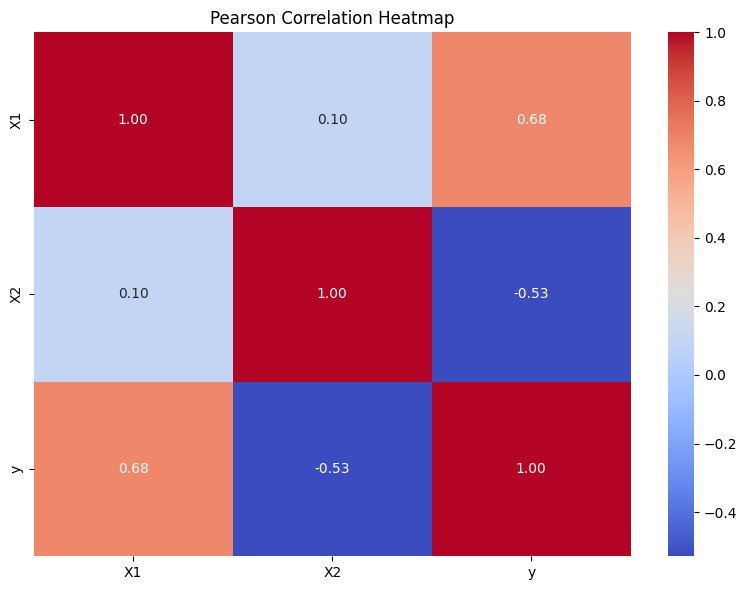

<Figure size 640x480 with 0 Axes>

In [9]:
# Correlation Heatmap
plot_correlation_heatmap(df)
save_and_show_plot("correlation_heatmap", EXPORT_PLOTS)

## 📌 Key Observations

- Variables `X1` and `X2` show different scales and spread.
- The target `y` is linearly influenced by both features with some skew present.
- There is mild correlation between `X1` and `y`, negative correlation with `X2`.
- Distribution of residuals will be more closely examined in the modeling phase.

# ✅ Summary:
- Loaded `ols_data.csv` dataset generated from `synthetic_data/`
- Computed descriptive statistics and central tendency using utility functions
- Visualized variable distributions using histograms, boxplots, and pairplots
- Computed skewness and Pearson-style kurtosis (no scipy used)
- Plotted heatmap of correlation matrix
- All future notebooks will follow this pattern for modularity and clarity